<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#What-is-GodsUnchained?" data-toc-modified-id="What-is-GodsUnchained?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is GodsUnchained?</a></span></li><li><span><a href="#What-have-I-tried-to-do-up-to-this-point?" data-toc-modified-id="What-have-I-tried-to-do-up-to-this-point?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>What have I tried to do up to this point?</a></span></li></ul></li><li><span><a href="#Let's-see-if-we-can-work-with-ERC721-tokens-via-Etherscan-API" data-toc-modified-id="Let's-see-if-we-can-work-with-ERC721-tokens-via-Etherscan-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's see if we can work with ERC721 tokens via Etherscan API</a></span></li><li><span><a href="#Get-transaction-history-for-a-contract" data-toc-modified-id="Get-transaction-history-for-a-contract-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get transaction history for a contract</a></span></li><li><span><a href="#Store-transactions-in-a-DataFrame" data-toc-modified-id="Store-transactions-in-a-DataFrame-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Store transactions in a DataFrame</a></span></li><li><span><a href="#Token-Name-category" data-toc-modified-id="Token-Name-category-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Token Name category</a></span><ul class="toc-item"><li><span><a href="#Trying-to-match-this-address-to-ERC-721-transactions" data-toc-modified-id="Trying-to-match-this-address-to-ERC-721-transactions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Trying to match this address to ERC-721 transactions</a></span></li></ul></li></ul></div>

## Introduction
### What is GodsUnchained?
* Gods Unchained is a card game that prides itself on players having "true ownership" of its in-game assets.  One of the first claims on its website is that you can use this to build extremely rare decks and sell them if you want to; a feature most modern games are adamantly against
    * cards are associated with ERC-721 tokens - each is unique and some are rarer than others
* GU is built by ex-Google and Riot Games engineers
* cards unlocked just by playing the game
### What have I tried to do up to this point?
* In the other notebook I handed in, I just worked on using Python to get transaction details and lists of transactions for a given Ethereum wallet.  In this notebook, I'm doing the same thing with ERC-721 tokens.
* In this notebook, I get the transaction history of one contract (one that deals with a lot, if not all, GU transactions) as well as the transaction history of what I believe to be the address that all GU transactions go through
* Later on in the notebook, I try to see the ratio between the number of transactions to the GU wallet address vs. the number that are sent elsewhere - I'm assuming anything that isn't going to this GU address must be coming from it, since that's what we searched for.
* I'm thinking that any ERC-721 token can be traced back to a GU transaction if it is part of this contract address (discussed more in depth later) or if its to/from the wallet address

## Let's see if we can work with ERC721 tokens via Etherscan API
https://etherscan.io/apis#accounts
choose ERC721 tokens towards the bottom on this link

choose a GodsUnchained card holder from here: 
https://bloxy.info/token_holders/0x0e3a2a1f2146d86a604adc220b4967a898d7fe07

For this example, we'll use the following address:
0x26cdee4269273e1ea5dfac6b5791df2656897738


Finding the right address was a little trickier for this one.  First, go to the etherscan page for your chosen wallet address (wallet must have a transaction with ERC721 tokens):
https://etherscan.io/address/0x26cdee4269273e1ea5dfac6b5791df2656897738#tokentxnsErc721

First, go over to the ERC721 tokens tab and click on whatever contract you want the transactions for.

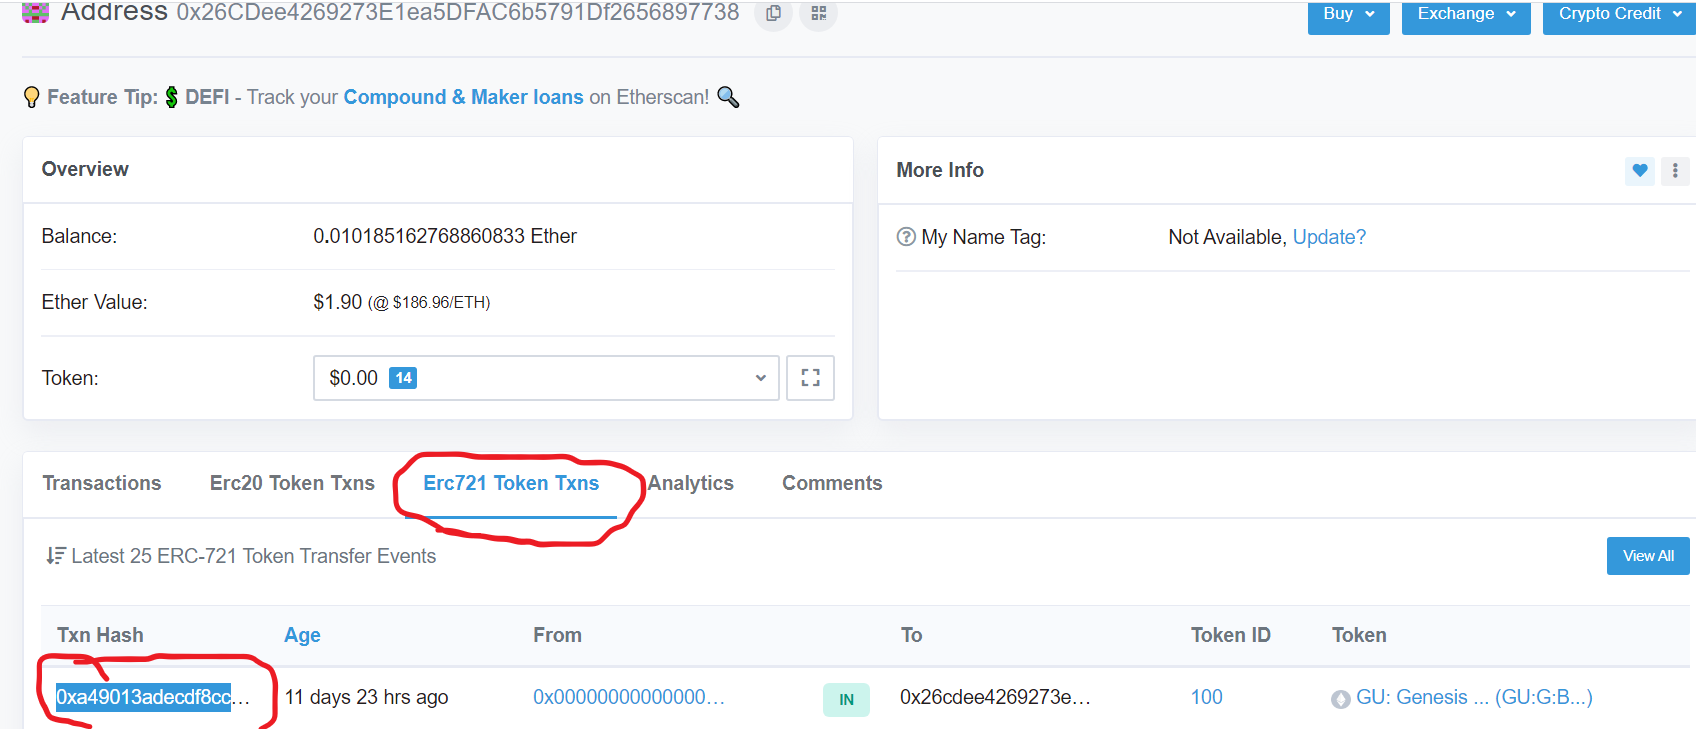

Look for the 'Contract' address on this page - this is what we'll be using to search

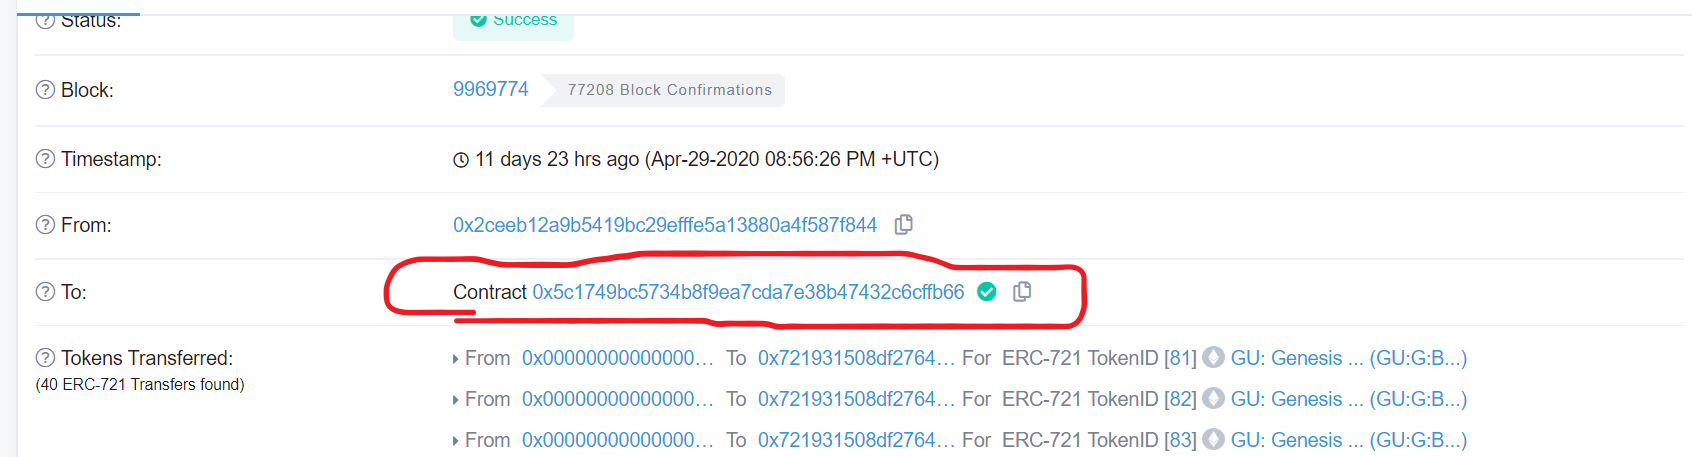

In [2]:
import requests # the requests module will help us connect to etherscan



address = '0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66' # contract address
key =  'MV3PBAW3Y5U9IC3WQKZGX8NTUGS9VAEZ28' # my api key
# change https to http (not encrypted)

url = 'https://api.etherscan.io/api?module=account&action=tokennfttx&contractaddress=' + address + \
    '&page=1&offset=100&sort=desc&apikey=' + key


"""
NOTE - in the url:
    offset changes the number of records that will be searched (in this case, 10 records)
    sort can change whether you're looking at the most recent transactions or the oldest
"""


# connect to address
response = requests.get(url)
print(response)

<Response [200]>


Response 200 means we're getting a valid result

## Get transaction history for a contract

In [3]:
address_content = response.json()
result = address_content.get("result") # get only the result of the transaction
#print(result)

In [ ]:
# for transaction in result:
#     print(transaction)

## Store transactions in a DataFrame

In [4]:
import pandas as pd
test_df = pd.DataFrame(columns=['ID', 'Hash', 'From', 'To', 'Value', 'contractAddress', 'tokenName','Confirmations'])
test_df

,ID,Hash,From,To,Value,contractAddress,tokenName,Confirmations


In [5]:
# lets try to get data from individual transactions
# we'll get some additional data with these transactions
for n, transaction in enumerate(result):
    # this will loop through and get the data we want from each record and then store it in test_df
    hash_ = transaction.get("hash")
    tx_from = transaction.get("from")
    tx_to = transaction.get("to")
    value = transaction.get("value")
    contractAddress = transaction.get("contractAddress")
    tokenName = transaction.get("tokenName")
    confirmations = transaction.get("confirmations")
    

    #new_data = [n, hash_, tx_from, tx_to, value, confirmations]
    test_df = test_df.append({'ID': n, 'Hash': hash_, 'From': tx_from, 'To': tx_to, 'Value': value, 'contractAdress': contractAddress, 'tokenName': tokenName, 'Confirmations': confirmations}, ignore_index = True)

test_df


,ID,Hash,From,To,Value,contractAddress,tokenName,Confirmations,contractAdress
0,0,0xbebe0f236b10558c6b53c04eafb2d4d88420876feee7...,0x27be4acb4e615b3f5e9b171eba3d88efb24a76a8,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,None,NaN,GU: Genesis Board,567,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
1,1,0x9b6e1adc00089a24738f078840264497a39cc0835bb6...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,None,NaN,GU: Genesis Board,979,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
2,2,0x9b6e1adc00089a24738f078840264497a39cc0835bb6...,0xbc9ca5bd0f07700929f8d538233b0a9e60f4ddc5,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,None,NaN,GU: Genesis Board,979,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
3,3,0x22951da6b6183f26093157500f06f75a6039c5bb85a1...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0xb14ea032d9a531e4abb191c3d3574b67f705847e,None,NaN,GU: Genesis Board,2245,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
4,4,0x22951da6b6183f26093157500f06f75a6039c5bb85a1...,0x24618c0d57fd54e55aacc5830a6e70721941c4b4,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,None,NaN,GU: Genesis Board,2245,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
5,5,0x8f6ba3fff209bf78cbc484f11e2502afd3068b766040...,0xc953f256672b4f4159aeae95005c6bbc7cf26e8a,0xbf5c6d85510e491cd45d1264fffec0c2c4282564,None,NaN,GU: Genesis Board,4688,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
6,6,0x8f6ba3fff209bf78cbc484f11e2502afd3068b766040...,0xc953f256672b4f4159aeae95005c6bbc7cf26e8a,0xbf5c6d85510e491cd45d1264fffec0c2c4282564,None,NaN,GU: Genesis Board,4688,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
7,7,0x68fb58f90d5169dff5a1b69ddbc23321d9f8963ba7bf...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0xbc9ca5bd0f07700929f8d538233b0a9e60f4ddc5,None,NaN,GU: Genesis Board,5444,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
8,8,0x68fb58f90d5169dff5a1b69ddbc23321d9f8963ba7bf...,0x24618c0d57fd54e55aacc5830a6e70721941c4b4,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,None,NaN,GU: Genesis Board,5444,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66
9,9,0xf5cd8d1b101beb710527e4d9a7ca41853e76977d3793...,0xf377ce6924155da0a9f2ed707b3983419253a370,0xa2e08e1d550e557d72e2ca6f9e023e36281bfcf0,None,NaN,GU: Genesis Board,6174,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66


## Token Name category

I'm interested in the tokenName category, so I looked into it a bit more.  It seems like this token has its own contract that can be explored more in depth:
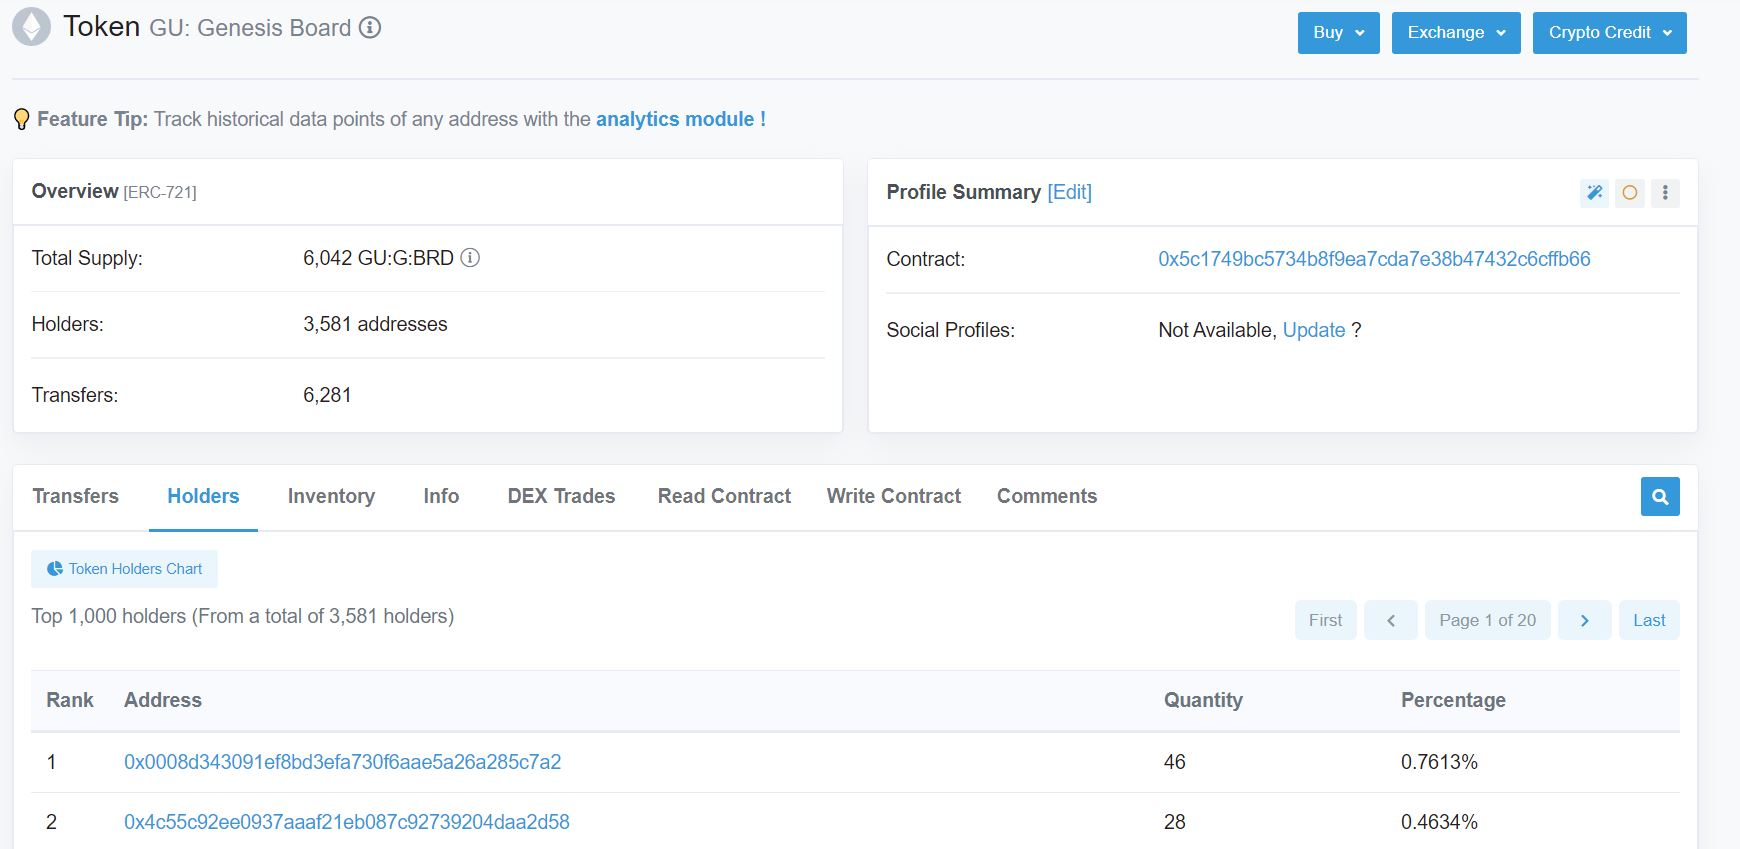

* Transfers
    * shows transactions under this contract
* Holders
    * shows the addresses of wallets that currently hold these tokens
    * this is the page the screenshot above is showing - the address we searched for in the last notebook holds 0.7613% of all of these tokens
* Inventory
    * I believe this is showing each token and the wallet address that owns it

I'm still trying to make complete sense of what this is.  Here is the link for what I'm taking about, if you want to poke around: https://etherscan.io/token/0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66?a=0x721931508df2764fd4f70c53da646cb8aed16ace
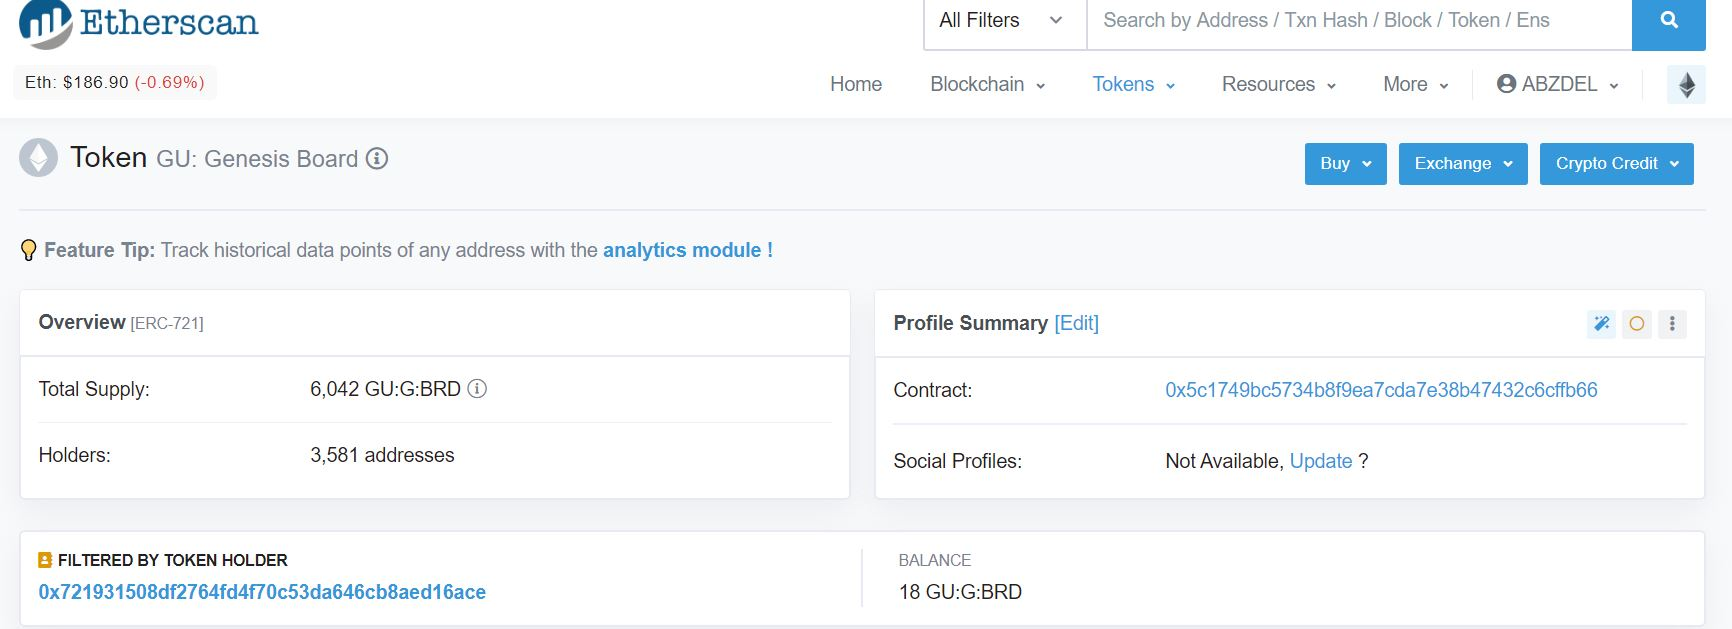

My thought is that the 'filtered by token holder' is the actual wallet address that all GU transactions go through, and the contract address is the contract that encapsulates all of the transactions.

### Trying to match this address to ERC-721 transactions

In [6]:
# this url searches the above wallet for the past 1000 transactions
# address = 0x721931508DF2764fD4F70C53Da646Cb8aEd16acE
new_url = 'https://api.etherscan.io/api?module=account&action=txlist&address=0x721931508DF2764fD4F70C53Da646Cb8aEd16acE&startblock=0&endblock=99999999&page=1&offset=1000&sort=desc&apikey=MV3PBAW3Y5U9IC3WQKZGX8NTUGS9VAEZ28'

In [7]:
test_df = pd.DataFrame(columns=['ID', 'Hash', 'From', 'To', 'Value', 'Confirmations'])
test_df # clear test DataFrame

,ID,Hash,From,To,Value,Confirmations


In [8]:
response = requests.get(new_url)
address_content = response.json()
result = address_content.get("result") # get only the result of the transaction

# lets try to get data from individual transactions
for n, transaction in enumerate(result):
    # this will loop through and get the data we want from each record and then store it in test_df
    hash_ = transaction.get("hash")
    tx_from = transaction.get("from")
    tx_to = transaction.get("to")
    value = transaction.get("value")
    confirmations = transaction.get("confirmations")

    #new_data = [n, hash_, tx_from, tx_to, value, confirmations]
    test_df = test_df.append({'ID': n, 'Hash': hash_, 'From': tx_from, 'To': tx_to, 'Value': value, 'Confirmations': confirmations}, ignore_index = True)

test_df


,ID,Hash,From,To,Value,Confirmations
0,0,0x6e0223152b1c86f8bb86e1d34f12eba357701d9c4b31...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x71603f59db350681a71f16c8bcac1f43837aa3af,210000000000000000,722
1,1,0x70e0ed53764894eefaeb73c504481640e9848e6e5b7d...,0x721931508df2764fd4f70c53da646cb8aed16ace,0xb99a23b1a4585fc56d0ec3b76528c27cad427473,0,827
2,2,0xa92710dc5855094cdb01defae562f8a6d0470592a53c...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x1aec8f11a7e78dc22477e91ed924fab46e3a88fd,0,833
3,3,0x34bdd9894fefd30bdda06aa1c8948d2d45f3ea44623c...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0,847
4,4,0x5cf3056280d6f238dc22ecf75ac96ff775f78c74f3c5...,0x721931508df2764fd4f70c53da646cb8aed16ace,0xf629cbd94d3791c9250152bd8dfbdf380e2a3b9c,0,847
5,5,0xd5ca8f658f498cdd76749601a945d1e55b6fc910364a...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x5c1749bc5734b8f9ea7cda7e38b47432c6cffb66,0,24154
6,6,0xdc6c0b1348adf519990f6f0c33f540b7a4d02608feb8...,0x721931508df2764fd4f70c53da646cb8aed16ace,0xfeae9fe11170fc19b6f40796fd1debfa360daacc,10000000000000000000,30463
7,7,0x368224aa1f39b276fbc1099e9e993f2511b26a460d5e...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x71603f59db350681a71f16c8bcac1f43837aa3af,950000000000000000,30484
8,8,0x3a7bc255f732b085556471e87d8ef1a3a2d4815665bd...,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0x721931508df2764fd4f70c53da646cb8aed16ace,10791000000000000000,30493
9,9,0x3da946ef50f9b13bd8719431392382f6352b3a56e3d9...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x4d3814d4da8083b41861dec2f45b4840e8b72d68,0,38477


In [9]:
test_df.To.value_counts()

0x0e3a2a1f2146d86a604adc220b4967a898d7fe07    177
0x721931508df2764fd4f70c53da646cb8aed16ace    120
0x7be8076f4ea4a4ad08075c2508e481d6c946d12b    114
0xb1f195776a62b4074a940fa135e58249e49315a3     64
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2     58
0x4d3814d4da8083b41861dec2f45b4840e8b72d68     55
0x960c6d43199e34dfdd9022e7ebdb9d154acc1c8b     41
0x71603f59db350681a71f16c8bcac1f43837aa3af     37
0xf4158e282f2317597e31c028978c7fb7275d6fb4     35
0x080bf510fcbf18b91105470639e9561022937712     25
0xd31eb2fe0f30b9bf09d635cc70f3727d7c16cad3     25
0xfeae9fe11170fc19b6f40796fd1debfa360daacc     21
0x2e61c63e045a978b51c6517c79c2592fcfbc82cd     17
0x76481caa104b5f6bccb540dae4cefaf1c398ebea     17
0xe34bb610505541b3fceff472dc5449053b632944     13
0x2af75676692817d85121353f0d6e8e9ae6ad5576     10
0x61935cbdd02287b511119ddb11aeb42f1593b7ef      9
0xd4690a51044db77d91d7aa8f7a3a5ad5da331af0      9
0x20d4cec36528e1c4563c1bfbe3de06aba70b22b4      8
0x8a9eba6cc332fda6919efbf3b8e90d163d3435b0      7


177 of the past transactions have gone to one address

In [10]:
def to_GU(x):
    if x==('0x721931508df2764fd4f70c53da646cb8aed16ace'):
        return 1
    else:
        return 0

In [11]:
# create new column for whether or not the transactions is to GU or from GU
# 1 if to GU, 0 if not
test_df['ToGU'] = test_df['To'].apply(to_GU)
test_df.head()

,ID,Hash,From,To,Value,Confirmations,ToGU
0,0,0x6e0223152b1c86f8bb86e1d34f12eba357701d9c4b31...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x71603f59db350681a71f16c8bcac1f43837aa3af,210000000000000000,722,0
1,1,0x70e0ed53764894eefaeb73c504481640e9848e6e5b7d...,0x721931508df2764fd4f70c53da646cb8aed16ace,0xb99a23b1a4585fc56d0ec3b76528c27cad427473,0,827,0
2,2,0xa92710dc5855094cdb01defae562f8a6d0470592a53c...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x1aec8f11a7e78dc22477e91ed924fab46e3a88fd,0,833,0
3,3,0x34bdd9894fefd30bdda06aa1c8948d2d45f3ea44623c...,0x721931508df2764fd4f70c53da646cb8aed16ace,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0,847,0
4,4,0x5cf3056280d6f238dc22ecf75ac96ff775f78c74f3c5...,0x721931508df2764fd4f70c53da646cb8aed16ace,0xf629cbd94d3791c9250152bd8dfbdf380e2a3b9c,0,847,0


In [21]:
test_df.ToGU.value_counts()

0    880
1    120
Name: ToGU, dtype: int64

I'm thinking that any transaction to the address 0x721931508df2764fd4f70c53da646cb8aed16ace is being sent, or maybe sold back, to GodsUnchained. Anything not going to that address must be coming from it (I think), so these are transactions from GU to other addresses, or items that a player bought in-game